<a href="https://colab.research.google.com/github/vzorspb/DE_Sprint/blob/main/Task_1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание к модулю 1.6

In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/DataEngineer.csv')
for index, row in df.iterrows():
    df.at[index,'Company Name']= row['Company Name'].split('\r\n')[0]
    if row['Founded']==-1:
       df.loc[index,'Founded']=np.nan
agg ={'Job Title':['count']}
job_title_list=df.groupby('Job Title').agg(agg).reset_index().sort_values([('Job Title','count')],ascending=False)
agg ={'Company Name':['count']}
company_list=df.groupby('Company Name').agg(agg).reset_index().sort_values([('Company Name','count')],ascending=False)
dataset_size=len(df)

Построить график компаний с самым большим кол-вом вакансий

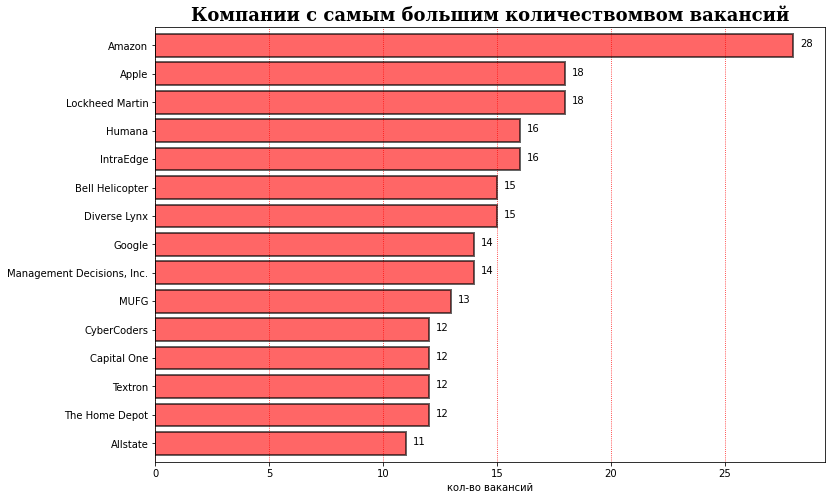

In [35]:
import matplotlib.pyplot as plt
list=company_list.head(15).sort_values(('Company Name','count'))

ax = list.plot.barh(x=('Company Name',''),y=('Company Name','count'),color='red',figsize=(12,8),edgecolor="k", linewidth=2, alpha=0.6, width=0.8)
ax.legend().set_visible(False)
x_offset = 0.3
y_offset = -0.45
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.x1 + b.x0)        
    ax.annotate(val, (( b.x1) + x_offset, b.y1 + y_offset))

plt.title('Компании с самым большим количествомвом вакансий',fontdict={'fontsize':18, 'fontfamily':'serif', 'fontweight':'bold'})
plt.ylabel('')
ax.set_axisbelow(True)
ax.grid(axis='x')
ax.xaxis.grid(color='r',linestyle='dotted',)
plt.xlabel('кол-во вакансий')
plt.show()